# Validación en el aprendizaje automático

A la hora de desarrollar un modelo de aprendizaje automático, es necesario validar su estabilidad y desempeño, no es suficiente con ajustar el modelo a los datos de entrenamiento y esperar que funcione con precisión para los datos reales y nuevos que no habia visto antes. Por lo cual, se necesita de algún tipo de garantía de que el modelo tiene la mayoría de los patrones de los datos correctos y de que no capta demasiado el ruido, o en otras palabras, tiene poco sesgo y varianza, lo que le permite generalizar el comportamiento de las características.

El proceso de decisión de si los resultados numéricos que cuantifican las relaciones hipotéticas entre variables son aceptables como descriptores de los datos, se conoce como **validación**. Generalmente, se realiza una estimación del error para el modelo después del *entrenamiento*, más conocida como evaluación de residuos o residuales. En el proceso mencionado, se realiza una estimación numérica en las respuestas originales y predichas, también llamado *error de entrenamiento*. Sin embargo, esto solos nos da una idea del desempeño del modelo con datos que conoce y que son utilizados para entrenarlo, siendo posible que este no se ajuste o se sobreajuste a los datos. Por lo cual, el problema con la técnica de evaluación mencionada es que no presenta una indicación de que tan bien podrá *generalizar* frente a un conjunto de datos nuevos e independientes. 

## Método de retención (Holdout Method)

Un método básico de validación implica en realizar una extracción de datos del conjunto de entrenamiento y usarlos para obtener predicciones del modelo entrenado. Luego, la estimación del error indicará como es el desempeño del modelo ante datos que no conoce pertenecientes al conjunto de prueba o validación. Esta es una técnica simple de validación cruzada. Aunque este método no requiere gastos generales de cálculo y es mejor que la validación tradicional, todavía presenta problemas de alta variación. Esto se debe a que no es seguro qué puntos de datos terminarán en el conjunto de validación y el resultado podría ser completamente distinto para diferentes conjuntos.

![Separación conjunto de datos](split_dataset.jpg)

## Validación cruzada (Cross Validation) de K-Fold

La validación cruzada es un método estadístico que se utiliza para estimar la habilidad de los modelos de aprendizaje automático. Se usa comúnmente en el aprendizaje automático aplicado para comparar y seleccionar un modelo para un problema de modelado predictivo dado porque es fácil de entender, fácil de implementar y da como resultado estimaciones de habilidades que generalmente tienen un sesgo más bajo que otros métodos.

En la validación cruzada de K-Fold, los datos se dividen en k subconjuntos. Ahora, el método de retención se repite k veces, de modo que cada vez, uno de los k subconjuntos se utiliza como conjunto de prueba o validación y los otros k-1 subconjuntos formarían un conjunto de entrenamiento. La estimación del error se promedia sobre todos los k ensayos para obtener la efectividad total del modelo. Esto reduce significativamente el sesgo, ya que se usan la mayoría de los datos para el ajuste, y se reduce significativamente la varianza, ya que la mayoría de los datos también se utilizan en el conjunto de validación. Intercambiar los conjuntos de entrenamiento y prueba también aumenta la efectividad de este método. Como regla general y evidencia empírica, generalmente se prefiere *K = 5 o 10*, pero nada es fijo y puede tomar cualquier otro valor.

![Cross Validation k-fold](Cross_validation-k.png)

Como complemento a esta técnica también se tiene la ***validación cruzada estratificada de K-Fold (Stratified K-Fold Cross Validation)*** para casos de desbalance en la variable de respuesta, de modo que cada pliegue contiene aproximadamente el mismo porcentaje de muestras de cada clase objetivo que el conjunto completo. Y, la ***validación cruzada de exclusión (Leave-P-Out Cross Validation)*** este enfoque deja p puntos de datos fuera de los datos de entrenamiento, es decir, si hay n puntos de datos en la muestra original, entonces se usan np muestras para entrenar el modelo y p puntos como conjunto de validación.

La validación cruzada es una técnica muy útil para evaluar la eficacia de los modelos, especialmente en los casos en los que se necesita mitigar el sobreajuste. También es útil para determinar los hiperparámetros del modelo, en el sentido de qué parámetros darán como resultado el error de prueba más bajo.

## Ejemplo práctico

In [73]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() # Estilos

## Sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
### Métricas de desempeño
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, balanced_accuracy_score
from sklearn.metrics import recall_score, roc_curve, auc, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve

# Configuración ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Métrica de evaluación

In [4]:
print(cross_val_score.__doc__)

Evaluate a score by cross-validation

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
        instance (e.g., :class:`GroupKFold`).

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)`` which should return only

In [5]:
# Función para cross validation k-fold
def cross_val(model, X, y):
    ''' Función para realizar la validación cruzada en el conjunto de datos '''
    
    kf = KFold(n_splits=10)
    scores = cross_val_score(model, X, y, cv=kf, scoring="f1")
    print(f"Metricas cross_validation \n{scores.round(2)}")
    print("Media de cross_validation", scores.mean().round(2))

### Carga del dataset

In [7]:
# Importamos el dataset load_breast_cancer de Sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer() #Viene en forma de diccionario

In [9]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Exploración Inicial

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

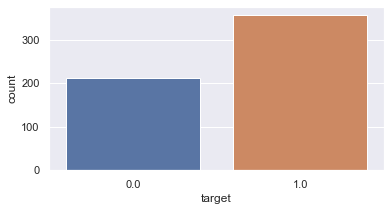

In [15]:
# Comportamiento variable respuesta
plt.figure(figsize=(6,3))
sns.countplot(df['target'],label="Count")
plt.show()

In [17]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

Con el propósito de facilitar el análisis en este ejercicio práctico, se seleccionan las columnas donde los nombres de los atributos comiencen con `mean`.

In [18]:
features_mean = list(df.columns[0:10])
features_mean

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [19]:
# Construimos un nuevo dataset únicamente con las variables seleccionadas en la celda anterior
df_cancer = df[features_mean + ['target']]
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.0


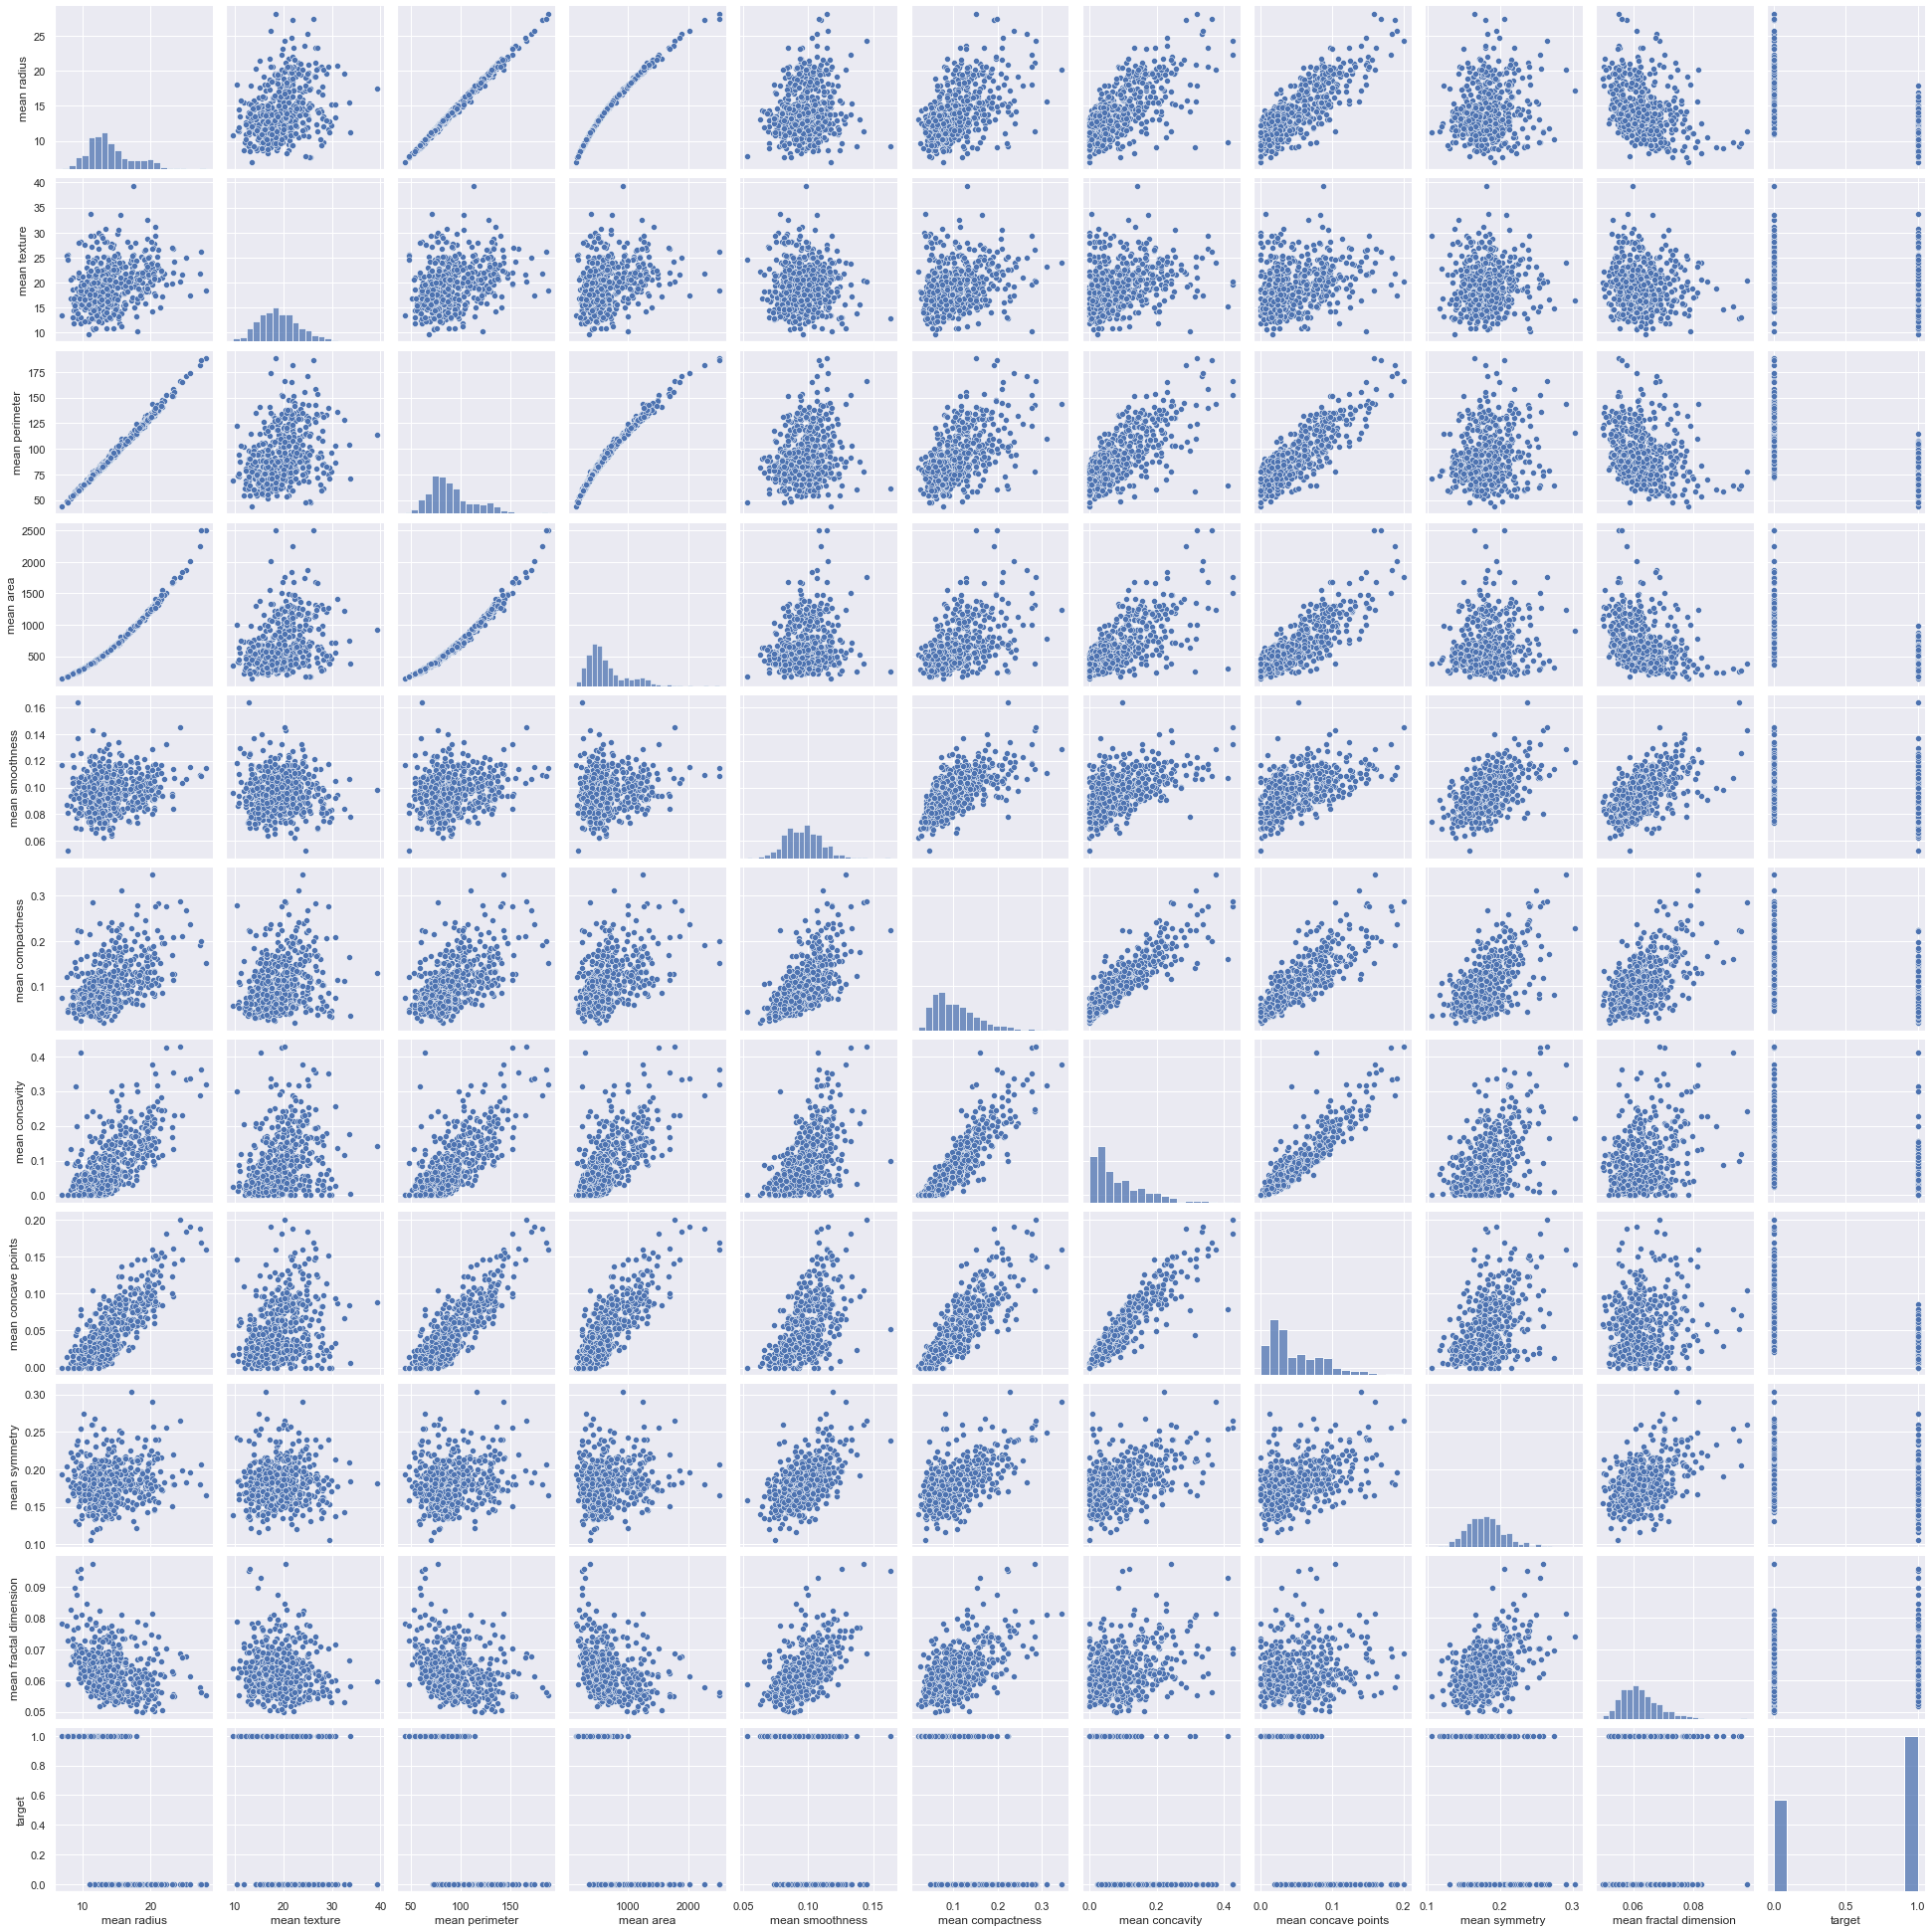

In [20]:
sns.pairplot(df_cancer)

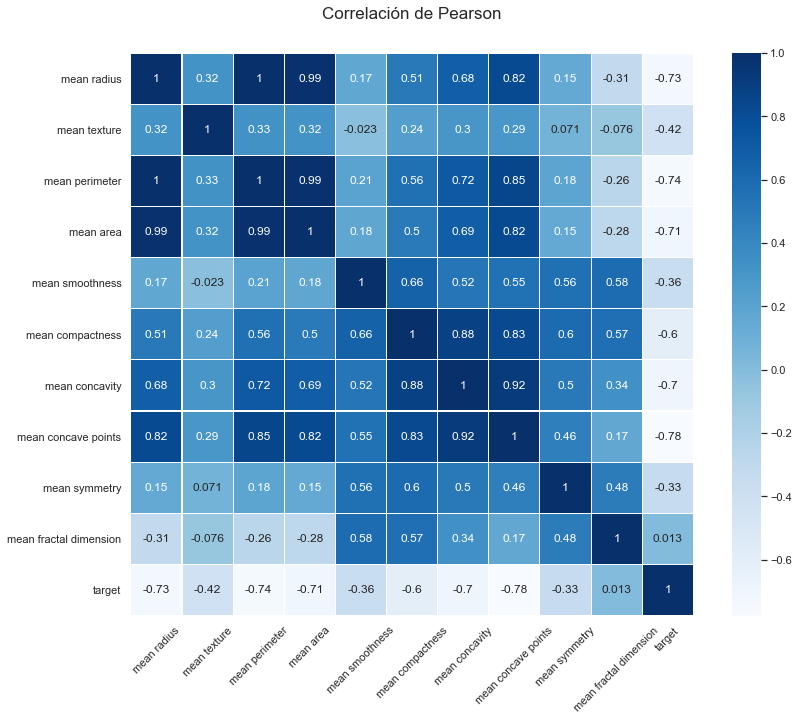

In [26]:
# Correlación de las variables - Pearson
corr = df_cancer.corr()
plt.figure(figsize=(14,14))
plt.subplot2grid((4,3),(0,0),rowspan = 3, colspan = 3 )
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, cmap='Blues', linecolor='white', annot=True)
plt.title('Correlación de Pearson', y=1.05, size=17)
plt.xticks(rotation = 45)
plt.show()

### Ajuste del modelo

Implementaremos el algoritmo de **Regresión Logística**.

In [48]:
# 1. Se define la variable independiente y dependiente

X = df_cancer.drop(columns = ['target'])
y = df_cancer['target']

X_names = X.columns

In [49]:
X_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [50]:
# Se procede a reescalar los datos con StandardScaler
# La clase sklearn.preprocessing.StandardScaler estándariza los datos eliminando la media y escalando los datos 
# de forma que su varianza sea igual a 1.

from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
X

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [56]:
# 2. Se separan los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 10) (114, 10) (455,) (114,)


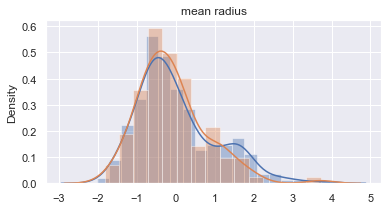

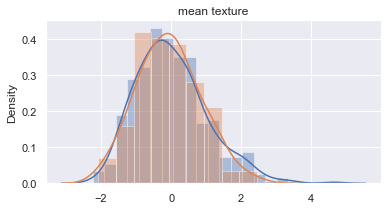

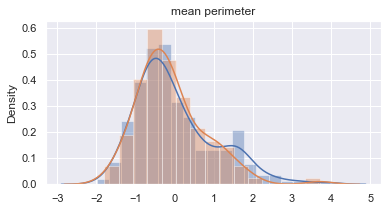

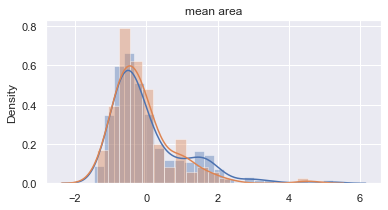

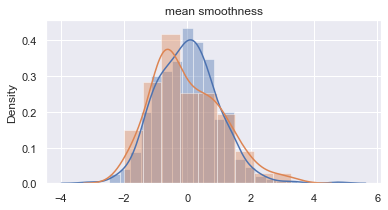

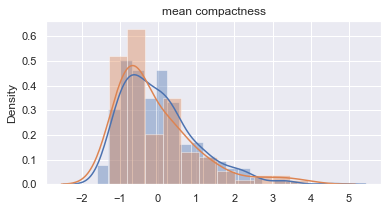

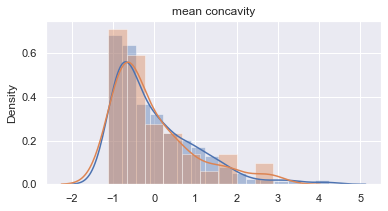

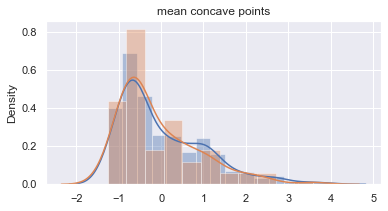

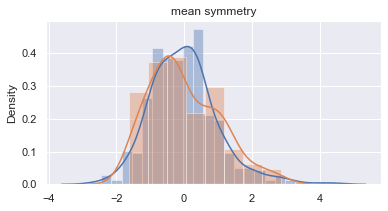

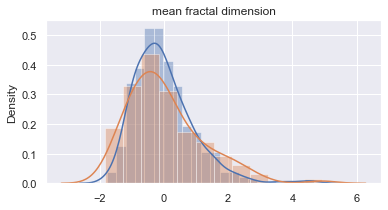

In [57]:
# Visualización de los datos
for i in range(X_train.shape[1]):
    plt.figure(figsize=(6,3))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.title(X_names[i])
    plt.show()

Se revisa la proporción de cada clase en las etiquetas en ambos conjuntos de datos.

In [61]:
print('Proporción de etiquetas positivas en datos de Train: ', y_train.sum()/y_train.size)
print('Proporción de etiquetas positivas en datos de Test: ', y_test.sum()/y_test.size)

Proporción de etiquetas positivas en datos de Train:  0.6263736263736264
Proporción de etiquetas positivas en datos de Test:  0.631578947368421


In [59]:
y_train.value_counts()

1.0    285
0.0    170
Name: target, dtype: int64

In [60]:
y_test.value_counts()

1.0    72
0.0    42
Name: target, dtype: int64

In [62]:
# 3. Se instancia el modelo de Regresión Logística
model_RL = LogisticRegression()

In [63]:
# 4. Se entrena el modelo
model_RL.fit(X_train, y_train)

LogisticRegression()

In [64]:
# 5. Se realizan las predicciones
y_train_pred = model_RL.predict(X_train)
y_test_pred = model_RL.predict(X_test)

In [65]:
# 6. Se evalua el desempeño del modelo
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9384615384615385
Accuracy sobre conjunto de Test: 0.9649122807017544


Es necesario elegir una **métrica de rendimiento** del modelo. Esto va a depender del problema y de si es una clasificación o una regresión. Se recomienda que las métricas tengan análisis numérico y también el análisis gráfico de los errores.

In [68]:
# Realizamos validación cruzada con la función construida: cross_val(model, X, y)

cross_val(model_RL, X, y)

Metricas cross_validation 
[0.67 0.96 0.94 0.94 0.93 0.99 0.96 0.98 0.98 0.93]
Media de cross_validation 0.93


In [69]:
cross_val(model_RL, X_test, y_test)

Metricas cross_validation 
[1.   0.94 1.   1.   1.   1.   0.77 0.92 1.   1.  ]
Media de cross_validation 0.96


### Matriz de confusión

La matriz de confusión “Confusion Matrix” de la librería de Sklearn, permite evaluar la precisión de la predicción en el proceso de clasificación binaria usando una tabla cruzada, arrojando información relevante como verdaderos positivos (True positive - TP), falsos positivos (False positive - FP), verdaderos negativos (True negative - TN) y falsos negativos (False negative - FN). Esta es usada debido a la gran importancia de visualizar el rendimiento en la predicción de los verdaderos positivos y falsos negativos.

![Matriz de Confusión](matriz_confusion.png)

![Métricas de desempeño](metricas_desempeño.png)

In [74]:
# Función para obtener algunas métricas de evaluación del desempeño del modelo
def model_metrics(model, X_test, y_test):
 
    y_test_pred = model.predict(X_test)
    print(f"Accuracy = {accuracy_score(y_test,y_test_pred)}")
    print(f"Recall = {recall_score(y_test,y_test_pred)}")

    #Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
    print(f"F1 score = {f1_score(y_test,y_test_pred)}")

    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_,
                              cmap=plt.cm.Blues, 
                              normalize='true')
    disp.ax_.set_title('Matriz de confusión')
    plt.show()

Siguiente el ejemplo práctico, hacemos uso de la función ***model_metrics(model, X_test, y_test)*** para evaluar las métricas de desempeño del modelo implementado de Regresión Logística.

Accuracy = 0.9649122807017544
Recall = 1.0
F1 score = 0.972972972972973


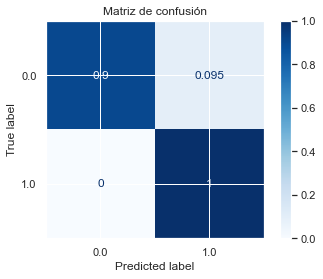

In [75]:
model_metrics(model_RL, X_test, y_test)

### Curva ROC

El AUC representa el área bajo la curva ROC “Receiver Operating Characteristic”, correspondiente a una gráfica que enfrenta la tasa de falsos positivos (1 - especificidad) como la coordenada en el eje X, con la tasa de verdaderos positivos (sensibilidad) como la coordenada en el eje Y, en varios umbrales del modelo definidos entre 0 y 1, por lo tanto, el modelo con AUC más cercano a 1 se considera un mejor modelo.

In [71]:
# Función para graficar la curva ROC
def roc_auc_metrics(model, name_model, X_test, y_test):

    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)[:, 1]
    # Calculamos el AUC
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # Imprimimos en pantalla
    print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
    print(name_model,'ROC AUC=%.3f' % (lr_auc))
    # Calculamos las curvas ROC
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # Pintamos las curvas ROC
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name_model)
    # Etiquetas de los ejes
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend()
    plt.show()

Siguiente el ejemplo práctico, hacemos uso de la función ***roc_auc_metrics(model, name_model, X_test, y_test)*** para evaluar la curva ROC del modelo implementado de Regresión Logística.

Sin entrenar: ROC AUC=0.500
Regresión Logística ROC AUC=0.983


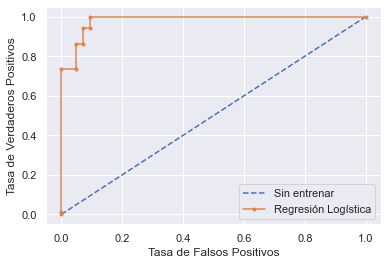

In [76]:
roc_auc_metrics(model_RL, "Regresión Logística", X_test, y_test)

## Conceptos de optimización de hiperparámetros

Hay diversos métodos para la optimización de hiperparámetros. Además de las prácticas de optimización "manual", es posible encontrar mejores hiperparámetros usando: Random Search, GridSearch, Descenso por gradiente y Optimización Bayesiana. Es una buena práctica que las búsquedas de mejores hiperparámetros estén acompañadas de validación cruzada.

Documentación de `GridSearchCV()` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Documentación de `RandomizedSearchCV()`[aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Si bien de forma general se busca maximizar accuracy, cuando se realiza optimización de hiperparámetros es recomendable evaluar con varias métricas: precisión, exhaustividad, F-Score y AUC-ROC, entre otras.

Adicional considerar que dependiendo del modelo que se está evaluando, las variables que se exploran son diferentes. Ejemplo: variables que pueden ser interesantes de explorar en el caso de un árbol de decisión: `criterion`, `max_depth`, `min_samples_split` y `min_samples_leaf`.
Para este mismo caso (árbol de decisión) hay 3 atributos del modelo (clase de la librería sklearn) que se usan para encontrar la mejor configuración, el mejor performance y el resto de resultados. Los atributos son: `best_params_`, `best_score_` y `cv_results_`.

## Errores de predicción en algoritmos de ML

El error de predicción para cualquier algoritmo de Machine Learning se puede dividir en tres partes:

![Errores de predicción](errores_prediccion.png)

*[Leer más información](https://aprendeia.com/bias-y-varianza-en-machine-learning/)*

## Overfitting y el Underfitting

Si se presenta Varianza alta, se recomienda:
+ Conseguir más ejemplos
+ Reducir la cantidad de features
+ Aumentar coeficiente de regularización (hacer el modelo más simple. Ej: en Lasso cuando aumentamos el alpha)

Si se presenta Bias alto, se recomienda:
+ Más features
+ Modelos más complejos

De forma general se puede decir que un modelo simple tiende a tener un sesgo algo. Un modelo complejo tiende a tener una varianza alta. Siempre es importante dignósticar en cuál de esos casos se está. Una vez identificado, hay que tratar de corregir eligiendo bien los parámetros del modelo o eligiendo otro modelo.

Si se percibe que hay un mal resultado en general, se sugiere probar con otro algoritmo o familia de modelos. Quizás las hipótesis del modelo no son cumplidas por el conjunto de datos.

## Métricas y evaluación

Para tener mayor profundidad en las métricas de evaluación, se sugiere explorar la [documentación](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

Un conjunto de métricas importantes son las derivadas de matriz de confusión. Se recomienda este [artículo](https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262) que explica su con bastante profundidad.

## Datos no balanceados (desbalanceados)

Desbalance de datos se da cuando la cantidad y el tipo de datos hace que haya una clase de la cual se tienen muy pocos datos. Por tal razón se genera un desbalance en los datos de entrenamiento del modelo. Ejemplo: en un dataset de pacientes con enfermedad y sin enefermedad, si hay muy pocos datos de pacientes con enfermedad, puede darse desbalanceo. También pasa en casos de detección de fraude, donde la cantidad de transacciones fraudulentas es generalmente baja en comparación con las transacciones normales. 

Con el fin de tener un buen desempeño de modelos, los análisis de datos desbalanceados suelen incluir técnicas como:
+ Generación de muestras sintéticas
+ Análisis de muestreo (oversampling, undersampling o weighting) - SMOTE
+ Stacking y Boosting
+ Cambiar (o usar otras) métricas de evaluación